# Handwriting Digit Recognition

In [85]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Step 1: Load and Preprocess Data

In [86]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# get the second test data
x_test = x_test[0:1]
y_test = y_test[0:1]

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# Step 2: Build the Neural Network Model

In [87]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

/home/adi/Startup/AI/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 3: Compile the Model

In [88]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model

In [89]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.4802 - val_accuracy: 1.0000 - val_loss: 5.3689e-04
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9550 - loss: 0.1514 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.9681 - loss: 0.1057 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.9730 - loss: 0.0865 - val_accuracy: 1.0000 - val_loss: 6.3757e-04
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9773 - loss: 0.0753 - val_accuracy: 1.0000 - val_loss: 2.7895e-05
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.9791 - loss: 0.0639 - val_accuracy: 1.0000 - val_loss: 2.7355e-04
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.9825 - loss: 0.0539 - val_accuracy: 1.0000 - val_loss: 4.7684e-06
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accu

# Step 5: Evaluate the Model

In [90]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - 19ms/step - accuracy: 1.0000 - loss: 3.5763e-07

Test accuracy: 1.0


# Step 6: Make Predictions

In [91]:
predictions = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


# Plot the first test image, true label, and predicted label

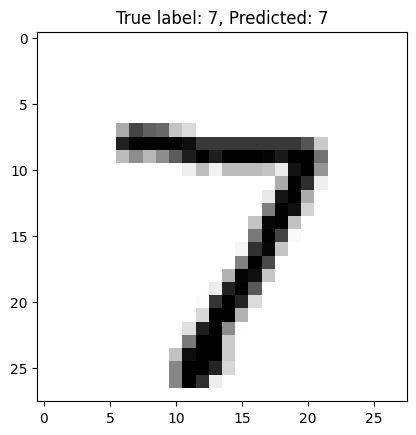

In [92]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"True label: {y_test[0]}, Predicted: {predictions[0].argmax()}")
plt.show()

## Predict The Image in data debug

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


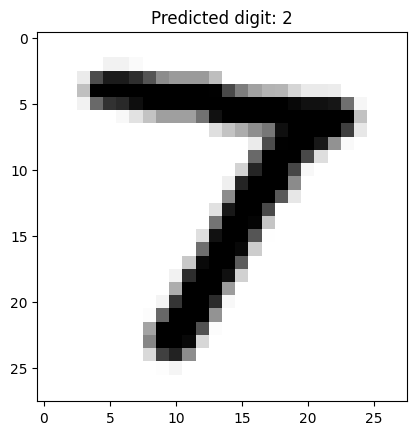

In [93]:
test_file_path = '../data/debug/preprocessed_debug.png'

# load image
image = Image.open(test_file_path)

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)

image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)
# predict the image using the model
predictions = model.predict(image)
# print the predicted digit
plt.title(f"Predicted digit: {predictions.argmax()}")
plt.show()
